In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_dev = pd.read_csv('dataset/development.csv')
df_eval = pd.read_csv('dataset/evaluation.csv')

df = pd.concat([df_dev, df_eval], sort=False)
df.head()

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900.0,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300.0,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700.0,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500.0,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400.0,tech,thursday


## Data exploration

In [3]:
len(df_dev), len(df_eval), len(df)

(31715, 7917, 39632)

In [4]:
df.isna().any(axis=0).sort_values(ascending=False)

num_keywords                     True
shares                           True
num_imgs                         True
num_videos                       True
min_positive_polarity           False
LDA_03                          False
LDA_04                          False
global_subjectivity             False
global_sentiment_polarity       False
global_rate_positive_words      False
global_rate_negative_words      False
rate_positive_words             False
rate_negative_words             False
avg_positive_polarity           False
id                              False
max_positive_polarity           False
LDA_01                          False
avg_negative_polarity           False
min_negative_polarity           False
max_negative_polarity           False
title_subjectivity              False
title_sentiment_polarity        False
abs_title_subjectivity          False
abs_title_sentiment_polarity    False
data_channel                    False
LDA_02                          False
self_referen

In [42]:
df_dev['shares'].isna().sum()

0

### Univariate analysis

#### Target variable (shares)
- There are some outliers in the target feature.

count     31715.000000
mean       3407.068863
std       11899.460219
min           4.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


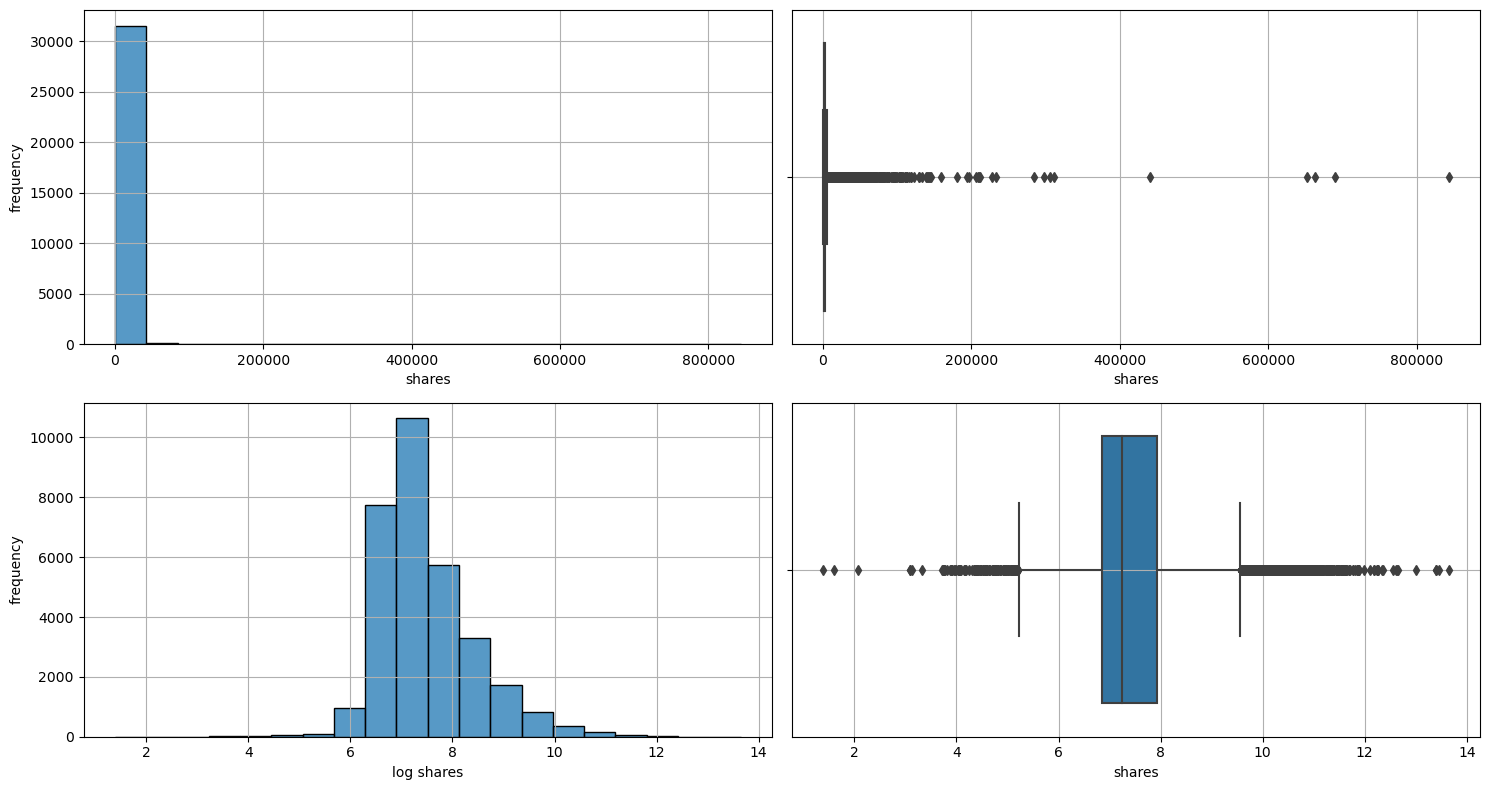

In [43]:
# Shares features
print(df_dev['shares'].describe())

fig, ax = plt.subplots(2,2, figsize=(15,8))
sns.histplot(df_dev['shares'], bins=20, kde=False, ax=ax[0][0])
ax[0][0].grid()
ax[0][0].set_xlabel('shares')
ax[0][0].set_ylabel('frequency')
sns.boxplot(x=df_dev['shares'], ax=ax[0][1])
ax[0][1].grid()

sns.histplot(np.log(df_dev['shares']), bins=20, kde=False, ax=ax[1][0])
ax[1][0].grid()
ax[1][0].set_xlabel('log shares')
ax[1][0].set_ylabel('frequency')
sns.boxplot(x=np.log(df_dev['shares']), ax=ax[1][1])
ax[1][1].grid()
plt.tight_layout()
plt.show()

#### Temporal features
- The data distribution of weekday feature is quite balance but the weekend days (Saturday and Sunday).
- Most of the articles were collected within 100 days after the publishment

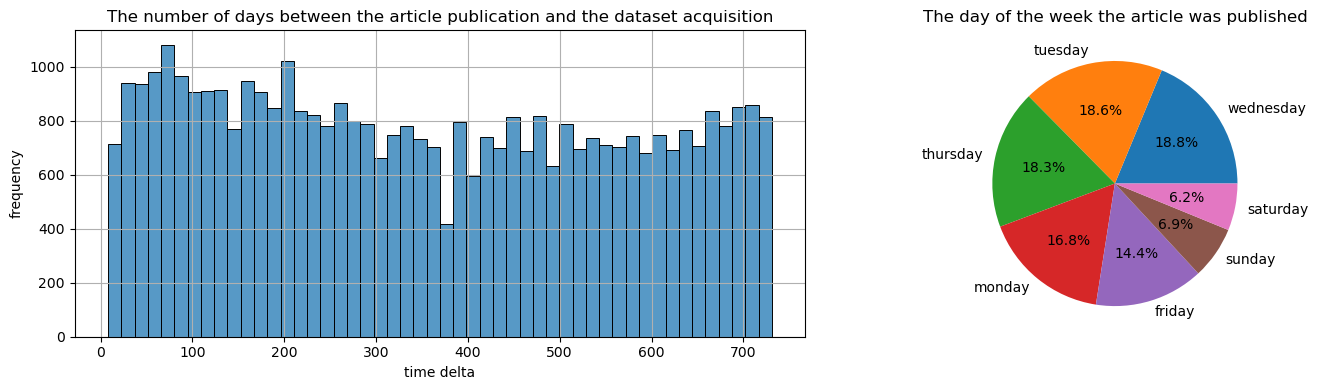

In [44]:
# Temporal features
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df['timedelta'], bins=50, kde=False, ax=ax[0])
ax[0].set_xlabel('time delta')
ax[0].set_ylabel('frequency')
ax[0].set_title('The number of days between the article publication and the dataset acquisition')
ax[0].grid()
weekday_percentage = (df['weekday'].value_counts() / df['weekday'].count())
ax[1].pie(weekday_percentage, labels=weekday_percentage.index, autopct='%1.1f%%')
ax[1].set_title('The day of the week the article was published')
plt.tight_layout()
plt.show()

#### Sentiment features
- All the "global_*" features are centered to 0 and are distributed like a Normal random variable
- It is not easy to understand if it preferable to use the "rate_*_words" or the "global_rate_*_words" features... For this reason we choose to make a correlation analysis with the target feature
- "min_positive_polarity" and "max_negative_polarity" have quite a similar distribution
- Some features are distributed in a range between [0, 1], other in [-1, 0] and the "title_sentiment_polarity" between [-1, +1]. It could be interesting to have these features in the same data range
- The "abs_title_sentiment_polarity" is useful to indicates the magnitude level of the title's polarity but it deletes the sign of the polarity
- There are some feature dependencies such as:
    - "rate_positive_words" and "rate_negative_words" depends on the corresponding "global" features

global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
rate_negative_words             0
avg_positive_polarity           0
min_positive_polarity           0
max_positive_polarity           0
avg_negative_polarity           0
min_negative_polarity           0
max_negative_polarity           0
title_subjectivity              0
abs_title_subjectivity          0
title_sentiment_polarity        0
abs_title_sentiment_polarity    0
dtype: int64


array([[<Axes: title={'center': 'global_subjectivity'}>,
        <Axes: title={'center': 'global_sentiment_polarity'}>,
        <Axes: title={'center': 'global_rate_positive_words'}>,
        <Axes: title={'center': 'global_rate_negative_words'}>],
       [<Axes: title={'center': 'rate_positive_words'}>,
        <Axes: title={'center': 'rate_negative_words'}>,
        <Axes: title={'center': 'avg_positive_polarity'}>,
        <Axes: title={'center': 'min_positive_polarity'}>],
       [<Axes: title={'center': 'max_positive_polarity'}>,
        <Axes: title={'center': 'avg_negative_polarity'}>,
        <Axes: title={'center': 'min_negative_polarity'}>,
        <Axes: title={'center': 'max_negative_polarity'}>],
       [<Axes: title={'center': 'title_subjectivity'}>,
        <Axes: title={'center': 'abs_title_subjectivity'}>,
        <Axes: title={'center': 'title_sentiment_polarity'}>,
        <Axes: title={'center': 'abs_title_sentiment_polarity'}>]],
      dtype=object)

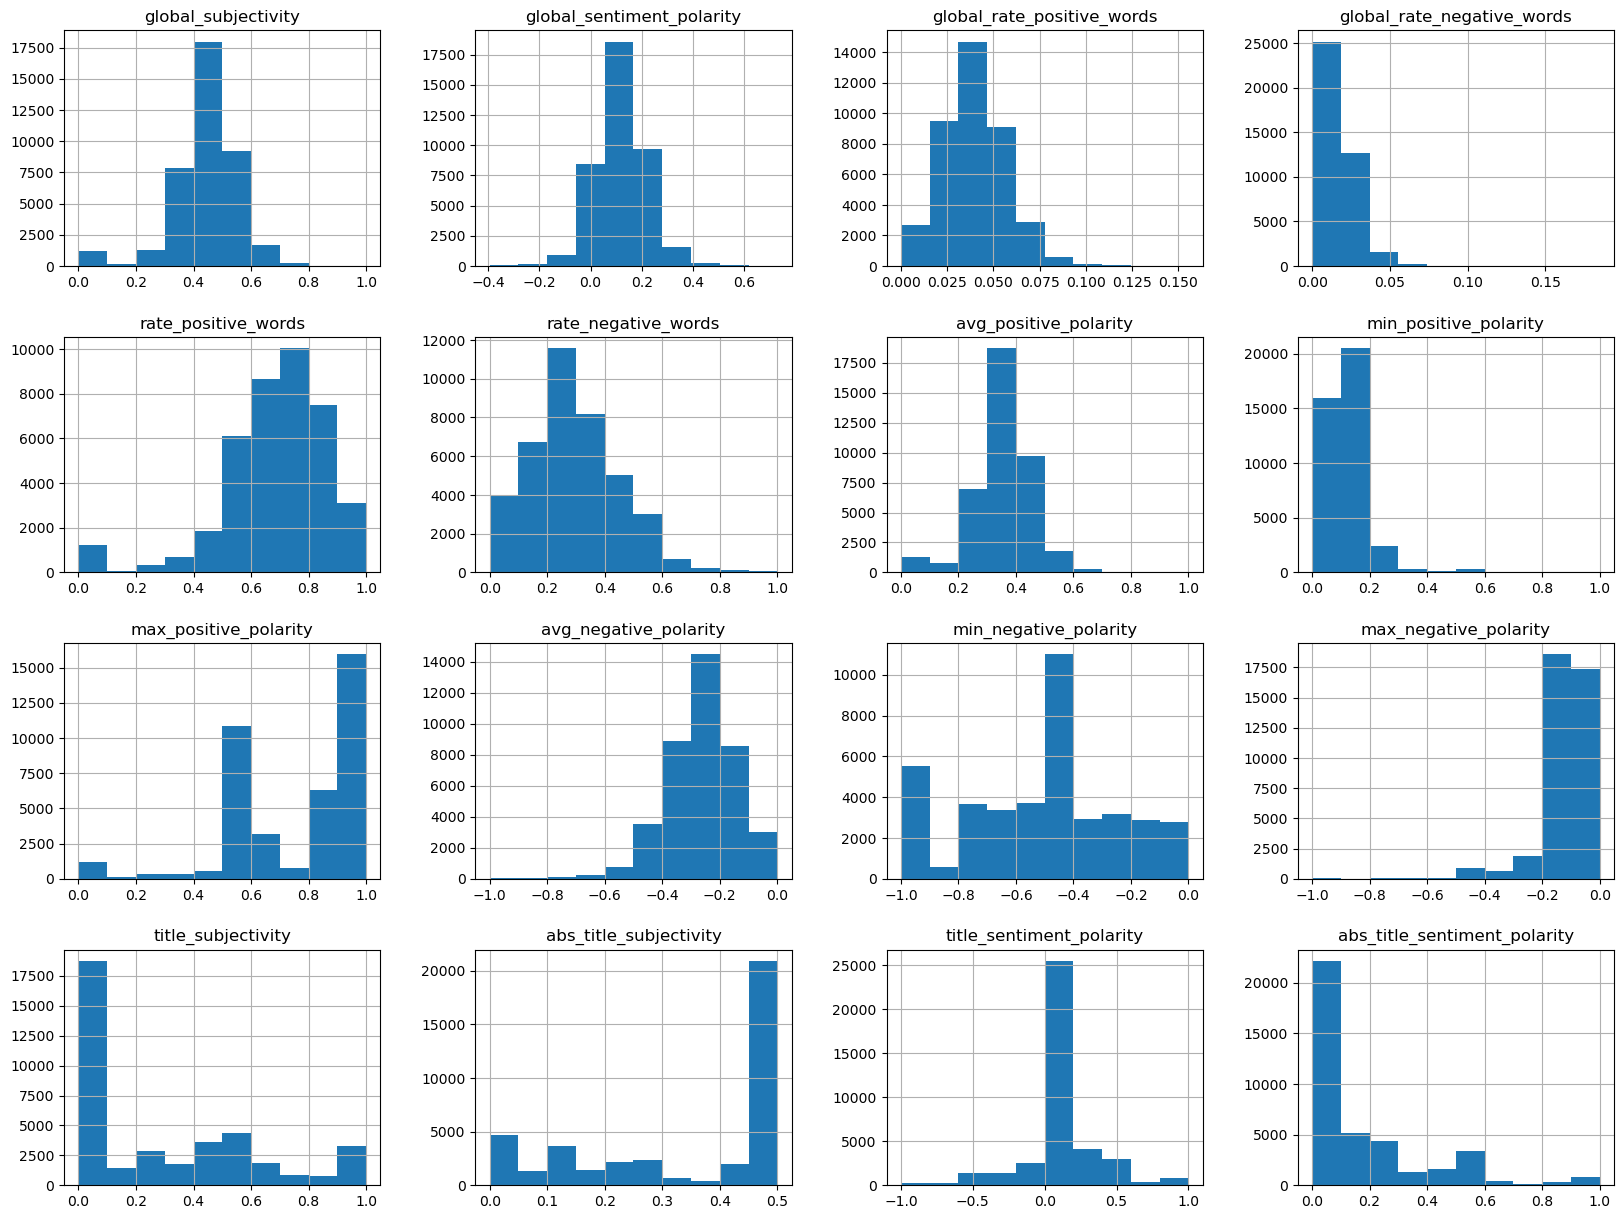

In [45]:
df_sentiment = df[['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words','rate_positive_words',
                   'rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity','avg_negative_polarity','min_negative_polarity',
                   'max_negative_polarity','title_subjectivity','abs_title_subjectivity','title_sentiment_polarity','abs_title_sentiment_polarity']]
print(df_sentiment.isna().sum())
df_sentiment.hist(figsize=(20,15),layout=(4,4))
# df_sentiment.plot.kde(figsize=(10,5),layout=(4,4))

#### Media features
- There are around 7925 NaN values and a lot of values below 2.
- There are outliers in both the features (see the box-plot)
- The Logarithmic transformation of the features improve the data stability and tends to distribute data like a Normal random variable, but the "num_video" feature continuous to stay unstable and with a lot of outliers

In [46]:
df[['num_imgs', 'num_videos']].isna().sum()

num_imgs      7927
num_videos    7925
dtype: int64

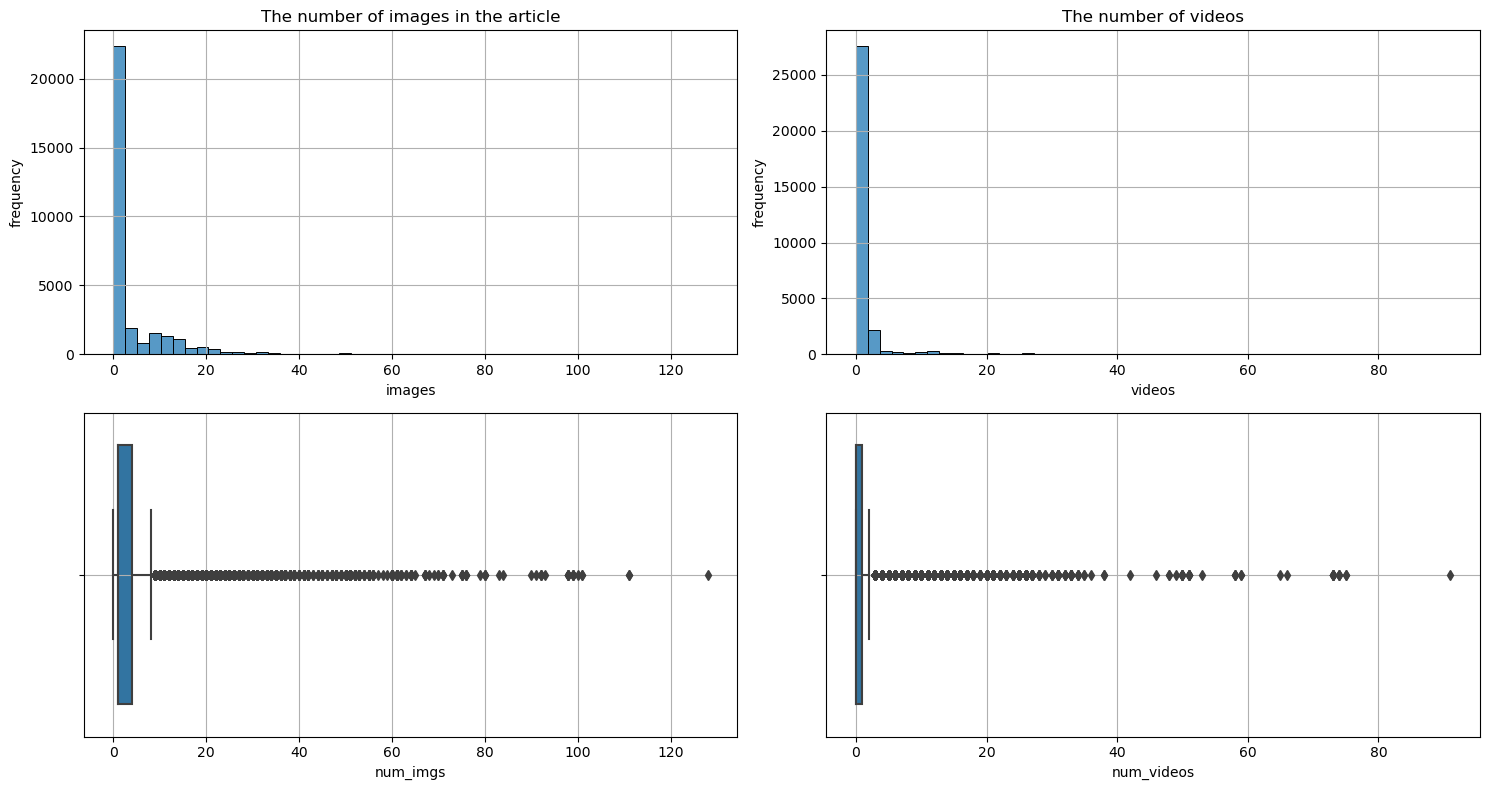

In [47]:
fig, ax = plt.subplots(2,2, figsize=(15,8))
sns.histplot(df['num_imgs'], bins=50, kde=False, ax=ax[0][0])
ax[0][0].set_xlabel('images')
ax[0][0].set_ylabel('frequency')
ax[0][0].set_title('The number of images in the article')
ax[0][0].grid()
sns.histplot(df['num_videos'], bins=50, kde=False, ax=ax[0][1])
ax[0][1].set_xlabel('videos')
ax[0][1].set_ylabel('frequency')
ax[0][1].set_title('The number of videos')
ax[0][1].grid()
sns.boxplot(x=df['num_imgs'], ax=ax[1][0])
ax[1][0].grid()
sns.boxplot(x=df['num_videos'], ax=ax[1][1])
ax[1][1].grid()
plt.tight_layout()
plt.show()

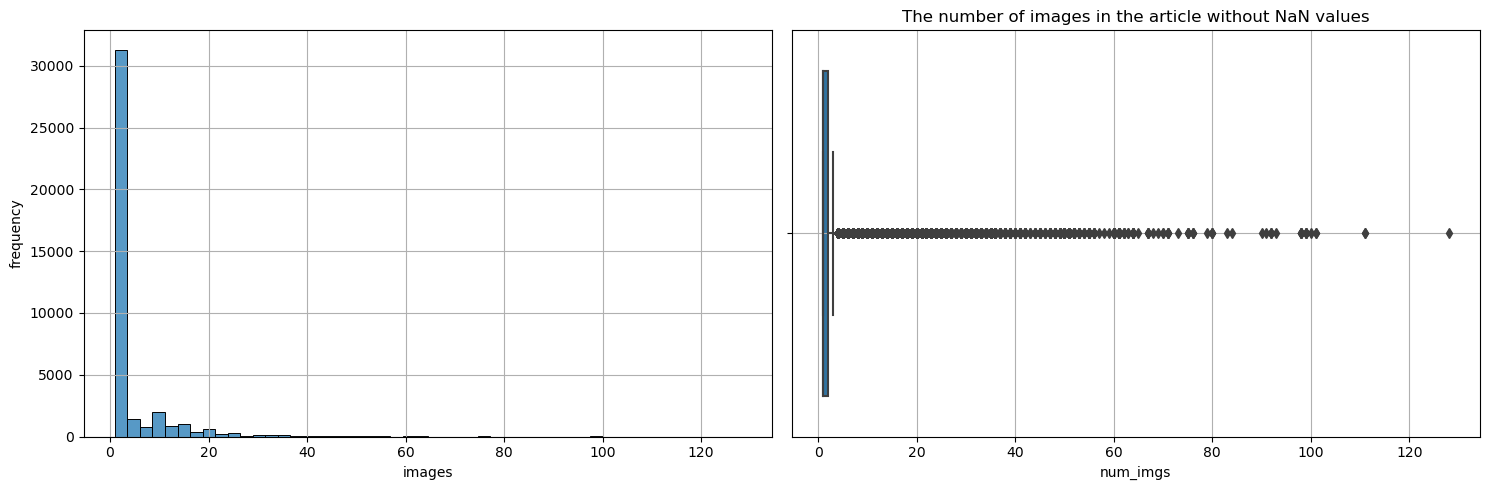

In [48]:
df_images_normalized = df[['num_imgs']].copy()
df_images_normalized['num_imgs'] = np.where(df_images_normalized['num_imgs'] == 0, 1, df_images_normalized['num_imgs'])
df_images_normalized['num_imgs'].fillna(1, inplace=True)

fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.title('The number of images in the article without NaN values')
sns.histplot(df_images_normalized['num_imgs'], bins=50, kde=False, ax=ax[0])
ax[0].set_xlabel('images')
ax[0].set_ylabel('frequency')
ax[0].grid()
sns.boxplot(x=df_images_normalized['num_imgs'], ax=ax[1])
ax[1].grid()
plt.tight_layout()
plt.show()

/home/gesposito/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gesposito/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/gesposito/miniconda3/envs/thesis/lib/python3.8/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


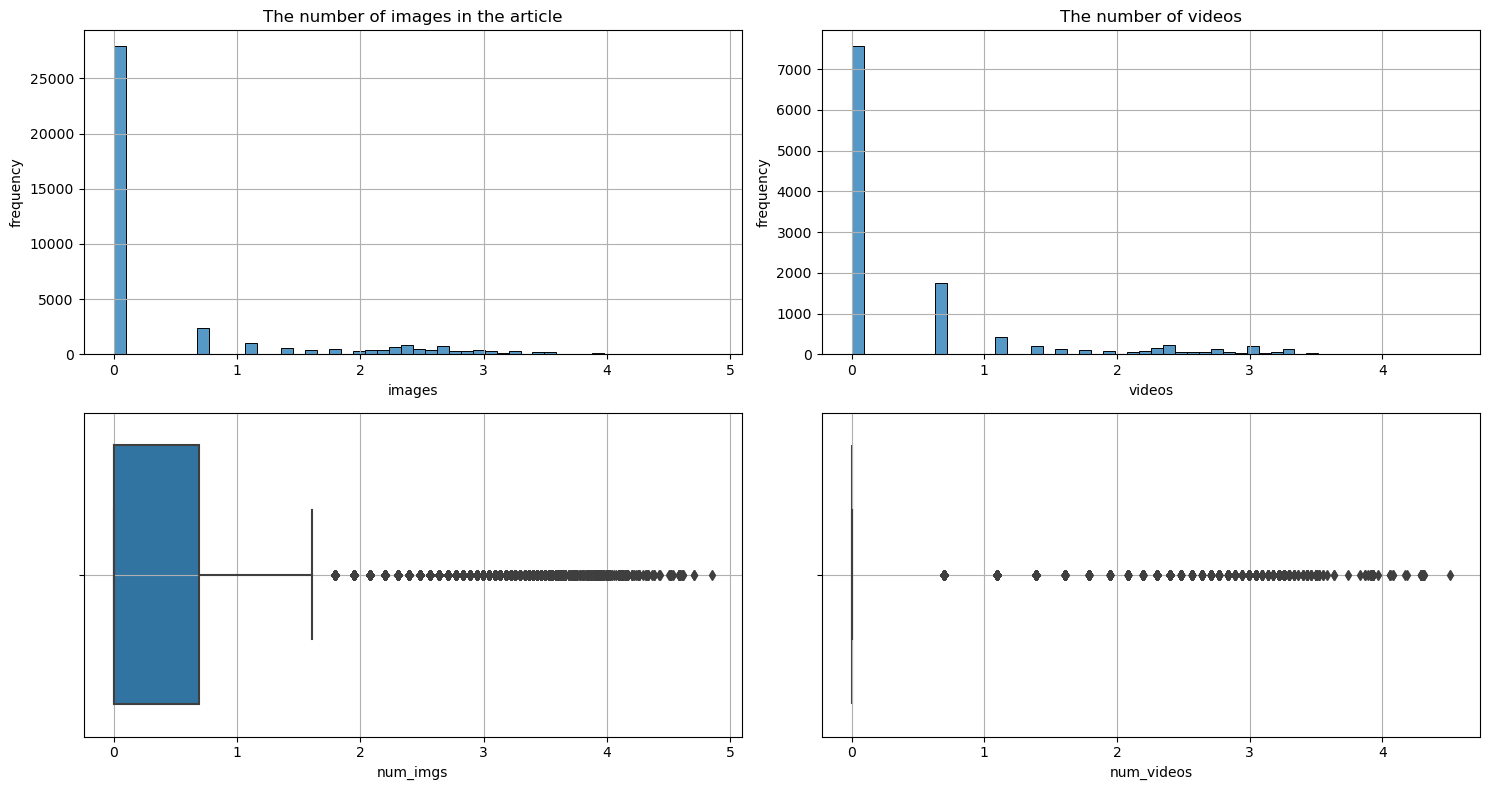

In [49]:
# Logarithmic transformation
fig, ax = plt.subplots(2,2, figsize=(15,8))
sns.histplot(np.log(df_images_normalized['num_imgs']), bins=50, kde=False, ax=ax[0][0])
ax[0][0].set_xlabel('images')
ax[0][0].set_ylabel('frequency')
ax[0][0].set_title('The number of images in the article')
ax[0][0].grid()
sns.histplot(np.log(df['num_videos']), bins=50, kde=False, ax=ax[0][1])
ax[0][1].set_xlabel('videos')
ax[0][1].set_ylabel('frequency')
ax[0][1].set_title('The number of videos')
ax[0][1].grid()
sns.boxplot(x=np.log(df_images_normalized['num_imgs']), ax=ax[1][0])
ax[1][0].grid()
sns.boxplot(x=np.log(df['num_videos']), ax=ax[1][1])
ax[1][1].grid()
plt.tight_layout()
plt.show()

#### Metadata features
- We've to discover how importance have all these features to predict the target variable

num_keywords    7926
kw_min_min         0
kw_max_min         0
kw_avg_min         0
kw_min_max         0
kw_max_max         0
kw_avg_max         0
kw_min_avg         0
kw_max_avg         0
kw_avg_avg         0
dtype: int64


/var/tmp/ipykernel_290663/893868315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadata['num_keywords'].fillna(0, inplace=True)


array([[<Axes: title={'center': 'num_keywords'}>,
        <Axes: title={'center': 'kw_min_min'}>,
        <Axes: title={'center': 'kw_max_min'}>],
       [<Axes: title={'center': 'kw_avg_min'}>,
        <Axes: title={'center': 'kw_min_max'}>,
        <Axes: title={'center': 'kw_max_max'}>],
       [<Axes: title={'center': 'kw_avg_max'}>,
        <Axes: title={'center': 'kw_min_avg'}>,
        <Axes: title={'center': 'kw_max_avg'}>],
       [<Axes: title={'center': 'kw_avg_avg'}>, <Axes: >, <Axes: >]],
      dtype=object)

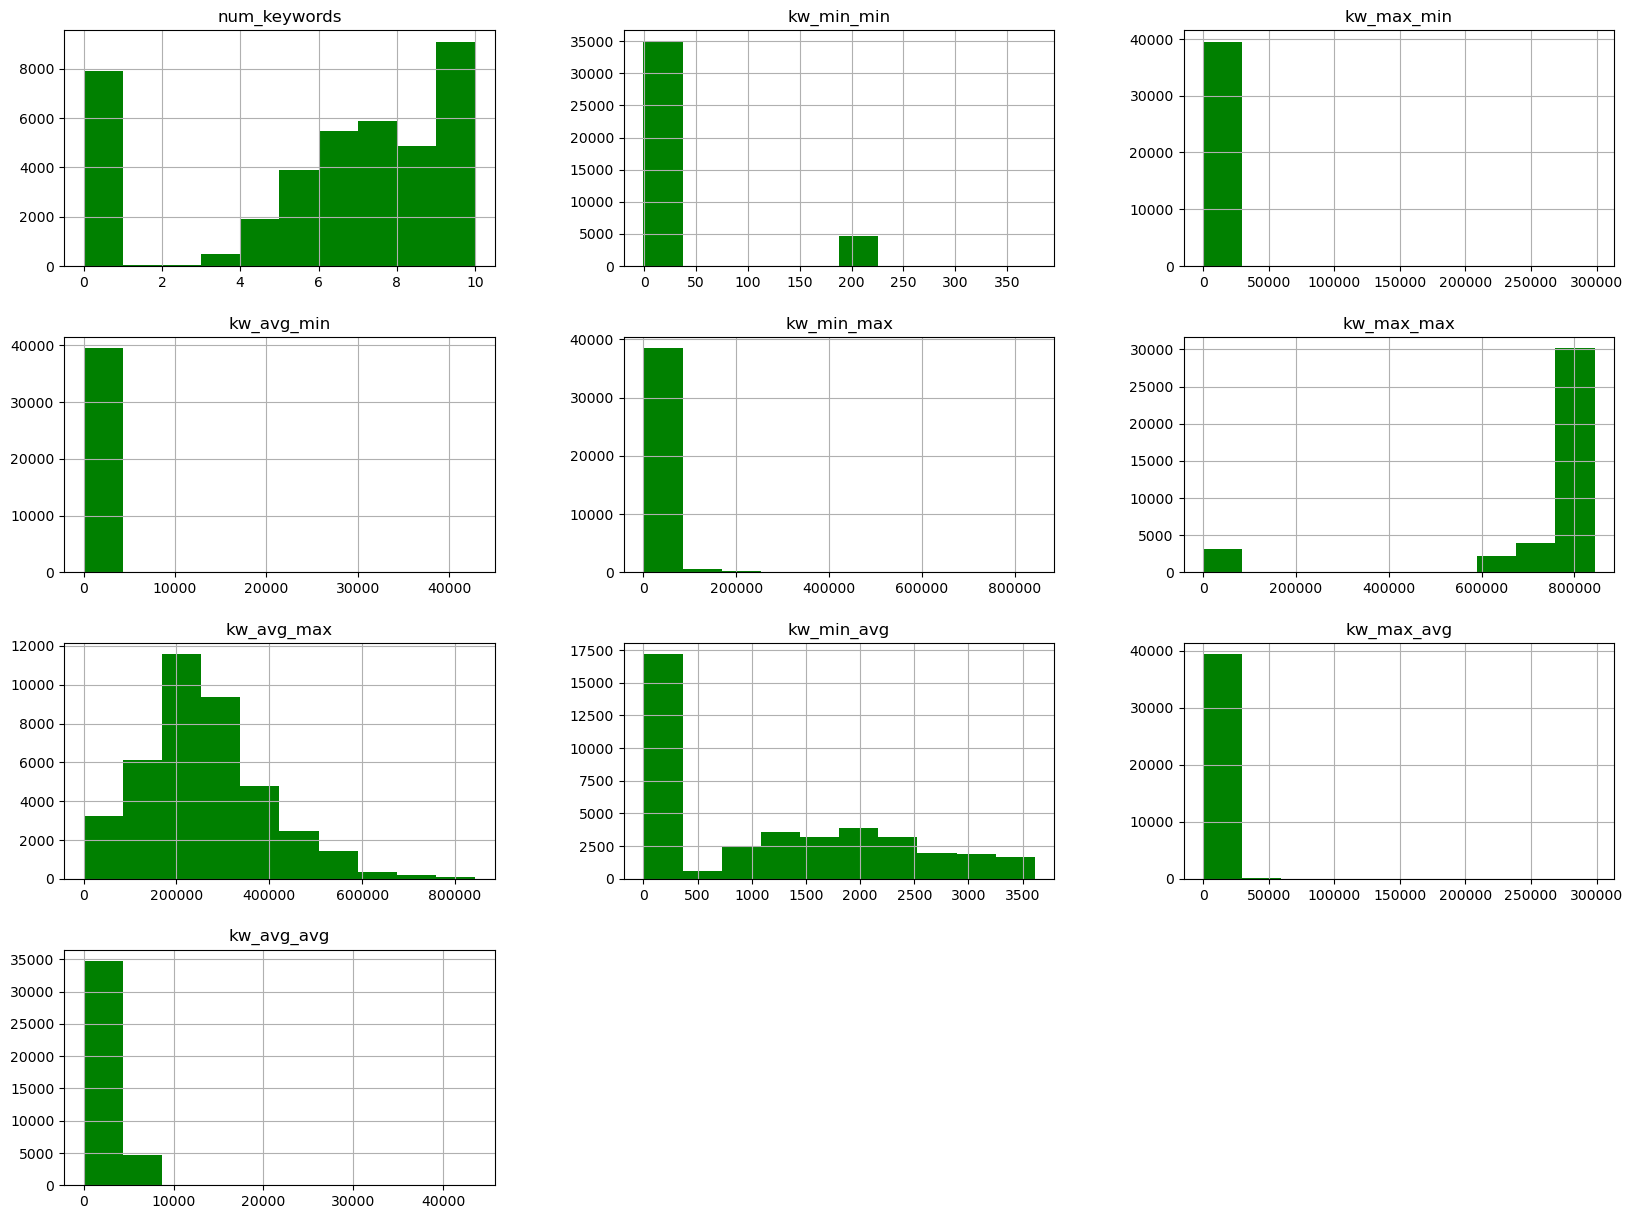

In [50]:
df_metadata = df[['num_keywords','kw_min_min','kw_max_min','kw_avg_min','kw_min_max','kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg']]
print(df_metadata.isna().sum())

df_metadata['num_keywords'].fillna(0, inplace=True)
df_metadata.hist(figsize=(20,15),layout=(4,3),color='green')

#### Linkage features
- The majority of the data are distributed around the zero value: this is because, when the "n_tokens_content" feature is zero this feature is equal to. The same reasoning hold for the "num_self_href"
- The min and the max self_reference shares are distribute quite in the same way; this means that this range of shares between min and max is meaning the same thing from a statistical point of view. We can assume that the average feature is a good trade-off between the two.

num_hrefs                     False
num_self_hrefs                False
self_reference_min_shares     False
self_reference_max_shares     False
self_reference_avg_sharess    False
dtype: bool


array([[<Axes: title={'center': 'num_hrefs'}>,
        <Axes: title={'center': 'num_self_hrefs'}>,
        <Axes: title={'center': 'self_reference_min_shares'}>],
       [<Axes: title={'center': 'self_reference_max_shares'}>,
        <Axes: title={'center': 'self_reference_avg_sharess'}>, <Axes: >]],
      dtype=object)

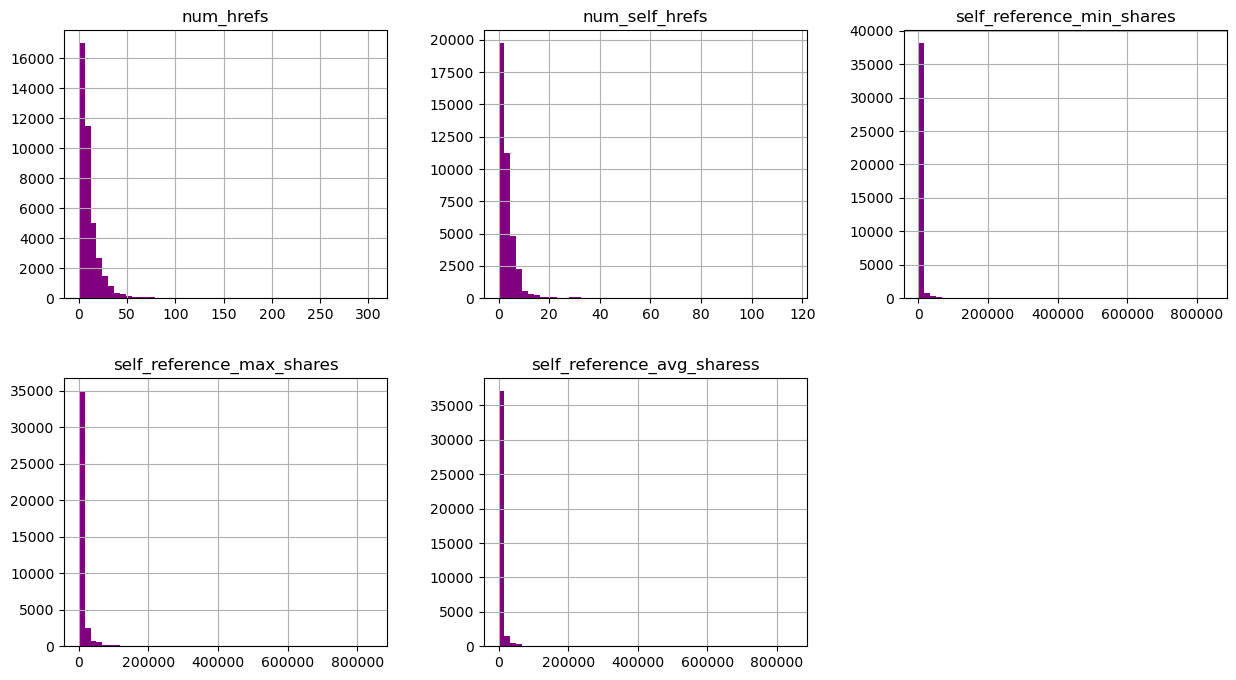

In [51]:
df_links = df[['num_hrefs','num_self_hrefs','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']]
print(df_links.isna().any())

df_links.hist(figsize=(15,8),layout=(2,3),color='purple', bins=50)

#### Article's statistics features
- There are a lot of zero values in the "n_tokens_content" feature. This also imply that a lot of values are considered as outliers from the data distribution box-plot
- The "n_unique_tokens", "n_non_stop_words" and "n_non_stop_unique_tokens" are features which depend on the "n_tokens_content": when the latter is 0, the others are 0

n_tokens_title              0
n_tokens_content            0
n_unique_tokens             0
n_non_stop_words            0
n_non_stop_unique_tokens    0
average_token_length        0
dtype: int64


array([[<Axes: title={'center': 'n_tokens_title'}>,
        <Axes: title={'center': 'n_tokens_content'}>,
        <Axes: title={'center': 'n_unique_tokens'}>],
       [<Axes: title={'center': 'n_non_stop_words'}>,
        <Axes: title={'center': 'n_non_stop_unique_tokens'}>,
        <Axes: title={'center': 'average_token_length'}>]], dtype=object)

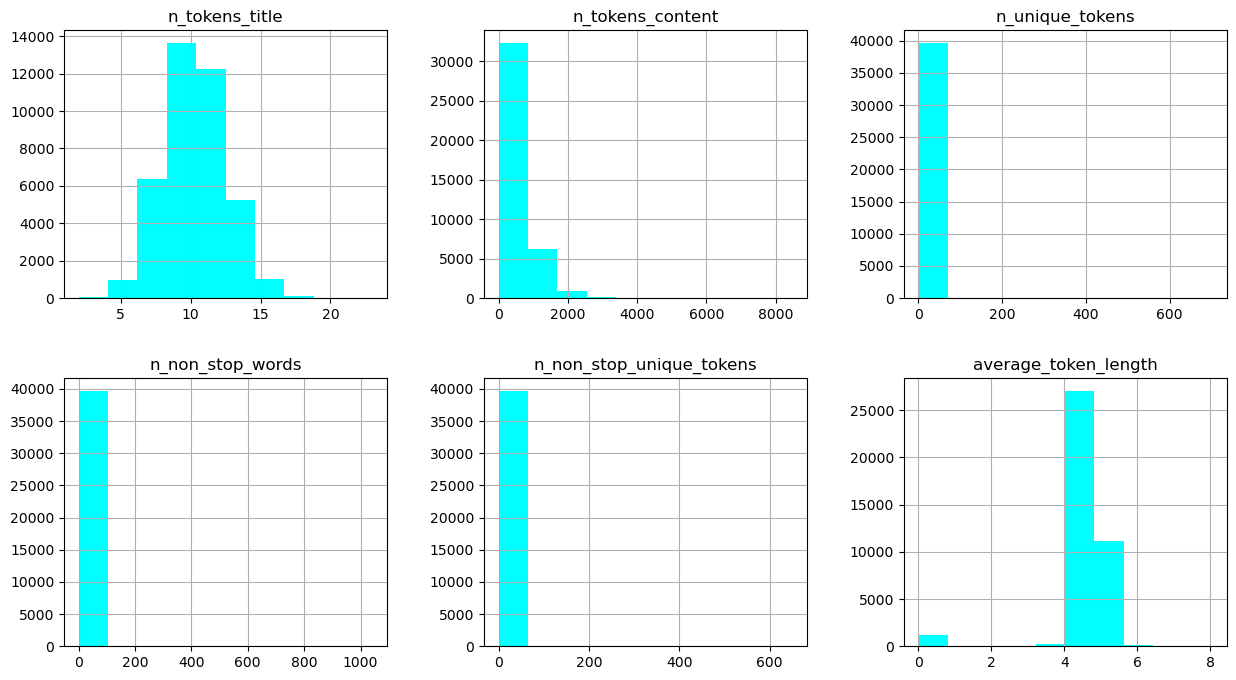

In [52]:
df_article_stats = df[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','average_token_length']]
print(df_article_stats.isna().sum())

df_article_stats.hist(figsize=(15,8),layout=(2,3),color='cyan')

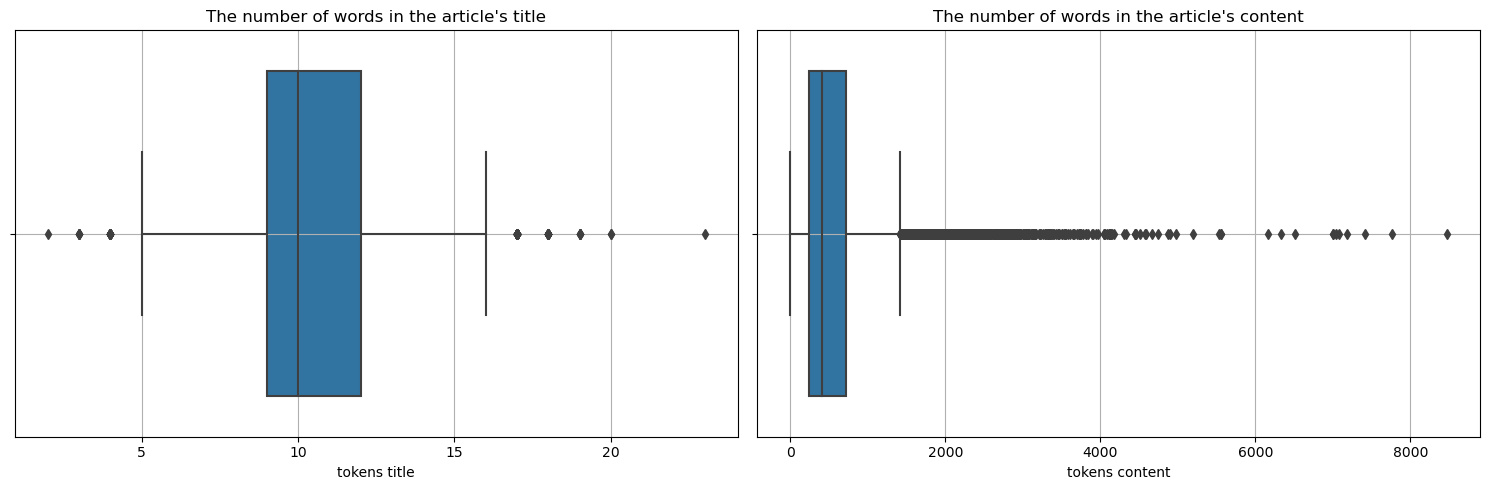

In [53]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.boxplot(x=df['n_tokens_title'], ax=ax[0])
ax[0].set_xlabel('tokens title')
ax[0].set_title('The number of words in the article\'s title')
ax[0].grid()
sns.boxplot(x=df['n_tokens_content'], ax=ax[1])
ax[1].set_xlabel('tokens content')
ax[1].set_title('The number of words in the article\'s content')
ax[1].grid()
plt.tight_layout()
plt.show()

#### Topics features
- The distribution of the data channels seems quite balance but social media which has the lowest percentage.
- LDA_* have all similar distributions and seems not to be so explicative features. Nevertheless, most of the imbalance is due to the presence of zero values which with some statistical calculations can be mapped to the feature which is not assigned to any LDA_* feature. 
- Without considering the 0 values, the distribution of LDA_* is quite uniform.

n_tokens_title              0
n_tokens_content            0
n_unique_tokens             0
n_non_stop_words            0
n_non_stop_unique_tokens    0
average_token_length        0
dtype: int64


/var/tmp/ipykernel_290663/3927952333.py:5: UserWarning: When passing multiple axes, layout keyword is ignored.
  df_topic.hist(figsize=(15,8),layout=(2,3),color='red', ax=np.array([ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1]]))


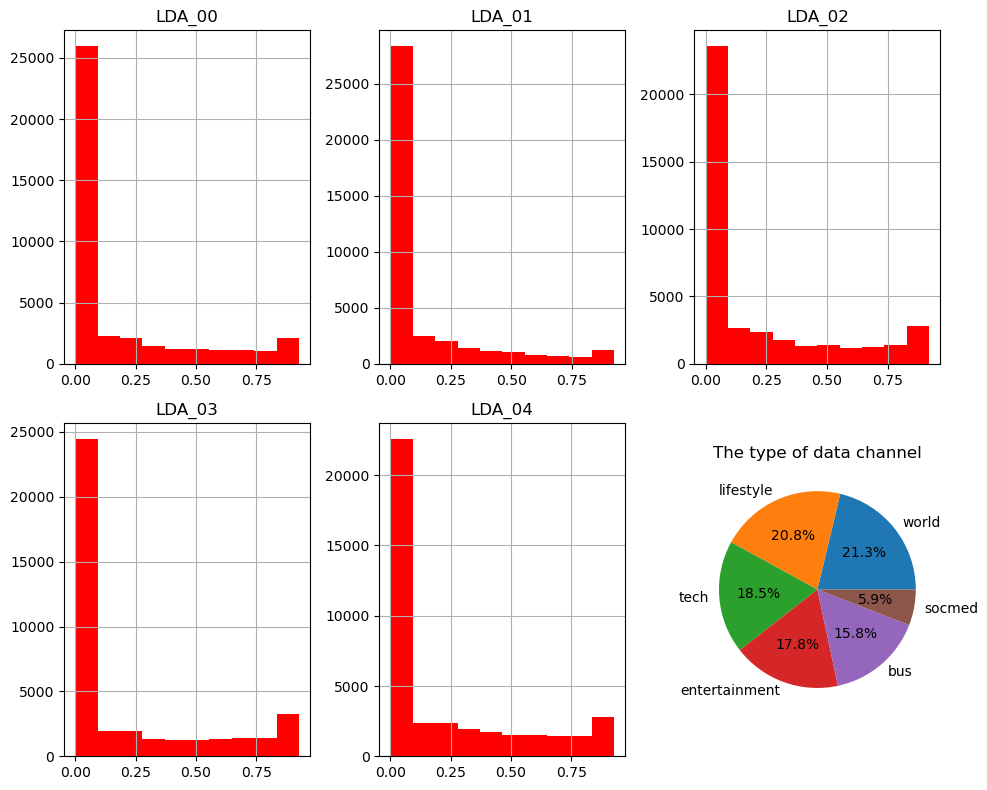

In [54]:
fig, ax = plt.subplots(2,3, figsize=(10,8))
df_topic = df[['data_channel', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']]
print(df_article_stats.isna().sum())

df_topic.hist(figsize=(15,8),layout=(2,3),color='red', ax=np.array([ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1]]))
channel_percentage = (df['data_channel'].value_counts() / df['data_channel'].count())
ax[1][2].pie(channel_percentage, labels=channel_percentage.index, autopct='%1.1f%%')
ax[1][2].set_title('The type of data channel')
plt.tight_layout()
plt.show()

### Multivariate analysis

##### One-hot encoding of categorical variables

In [15]:
enc = OneHotEncoder()
encoded_df = pd.concat([df_dev['weekday'], df_dev['data_channel']], axis=1)
enc.fit(encoded_df)
encoded_df = enc.transform(encoded_df)
additional_columns = enc.get_feature_names_out()
print(encoded_df.toarray().shape)
working_df_dev = df_dev.copy()
working_df_dev[additional_columns] = encoded_df.toarray()
working_df_dev.drop(['weekday', 'data_channel', 'url', 'id'], axis = 1, inplace=True)
working_df_dev

(31715, 13)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_socmed,data_channel_tech,data_channel_world
0,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Correlation between variables
- Features seems not so much linear correlated with the target variable

In [16]:
corr_mat = working_df_dev.corr()
tmp = corr_mat['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.10300643795401357
-0.058665674609122455


In [17]:
corr_mat_non_linear = working_df_dev.corr(method='spearman')
tmp = corr_mat_non_linear['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.2593608243962577
-0.16627460991501178


It seems that there are different variables correlated (maybe not linearly) with the target one

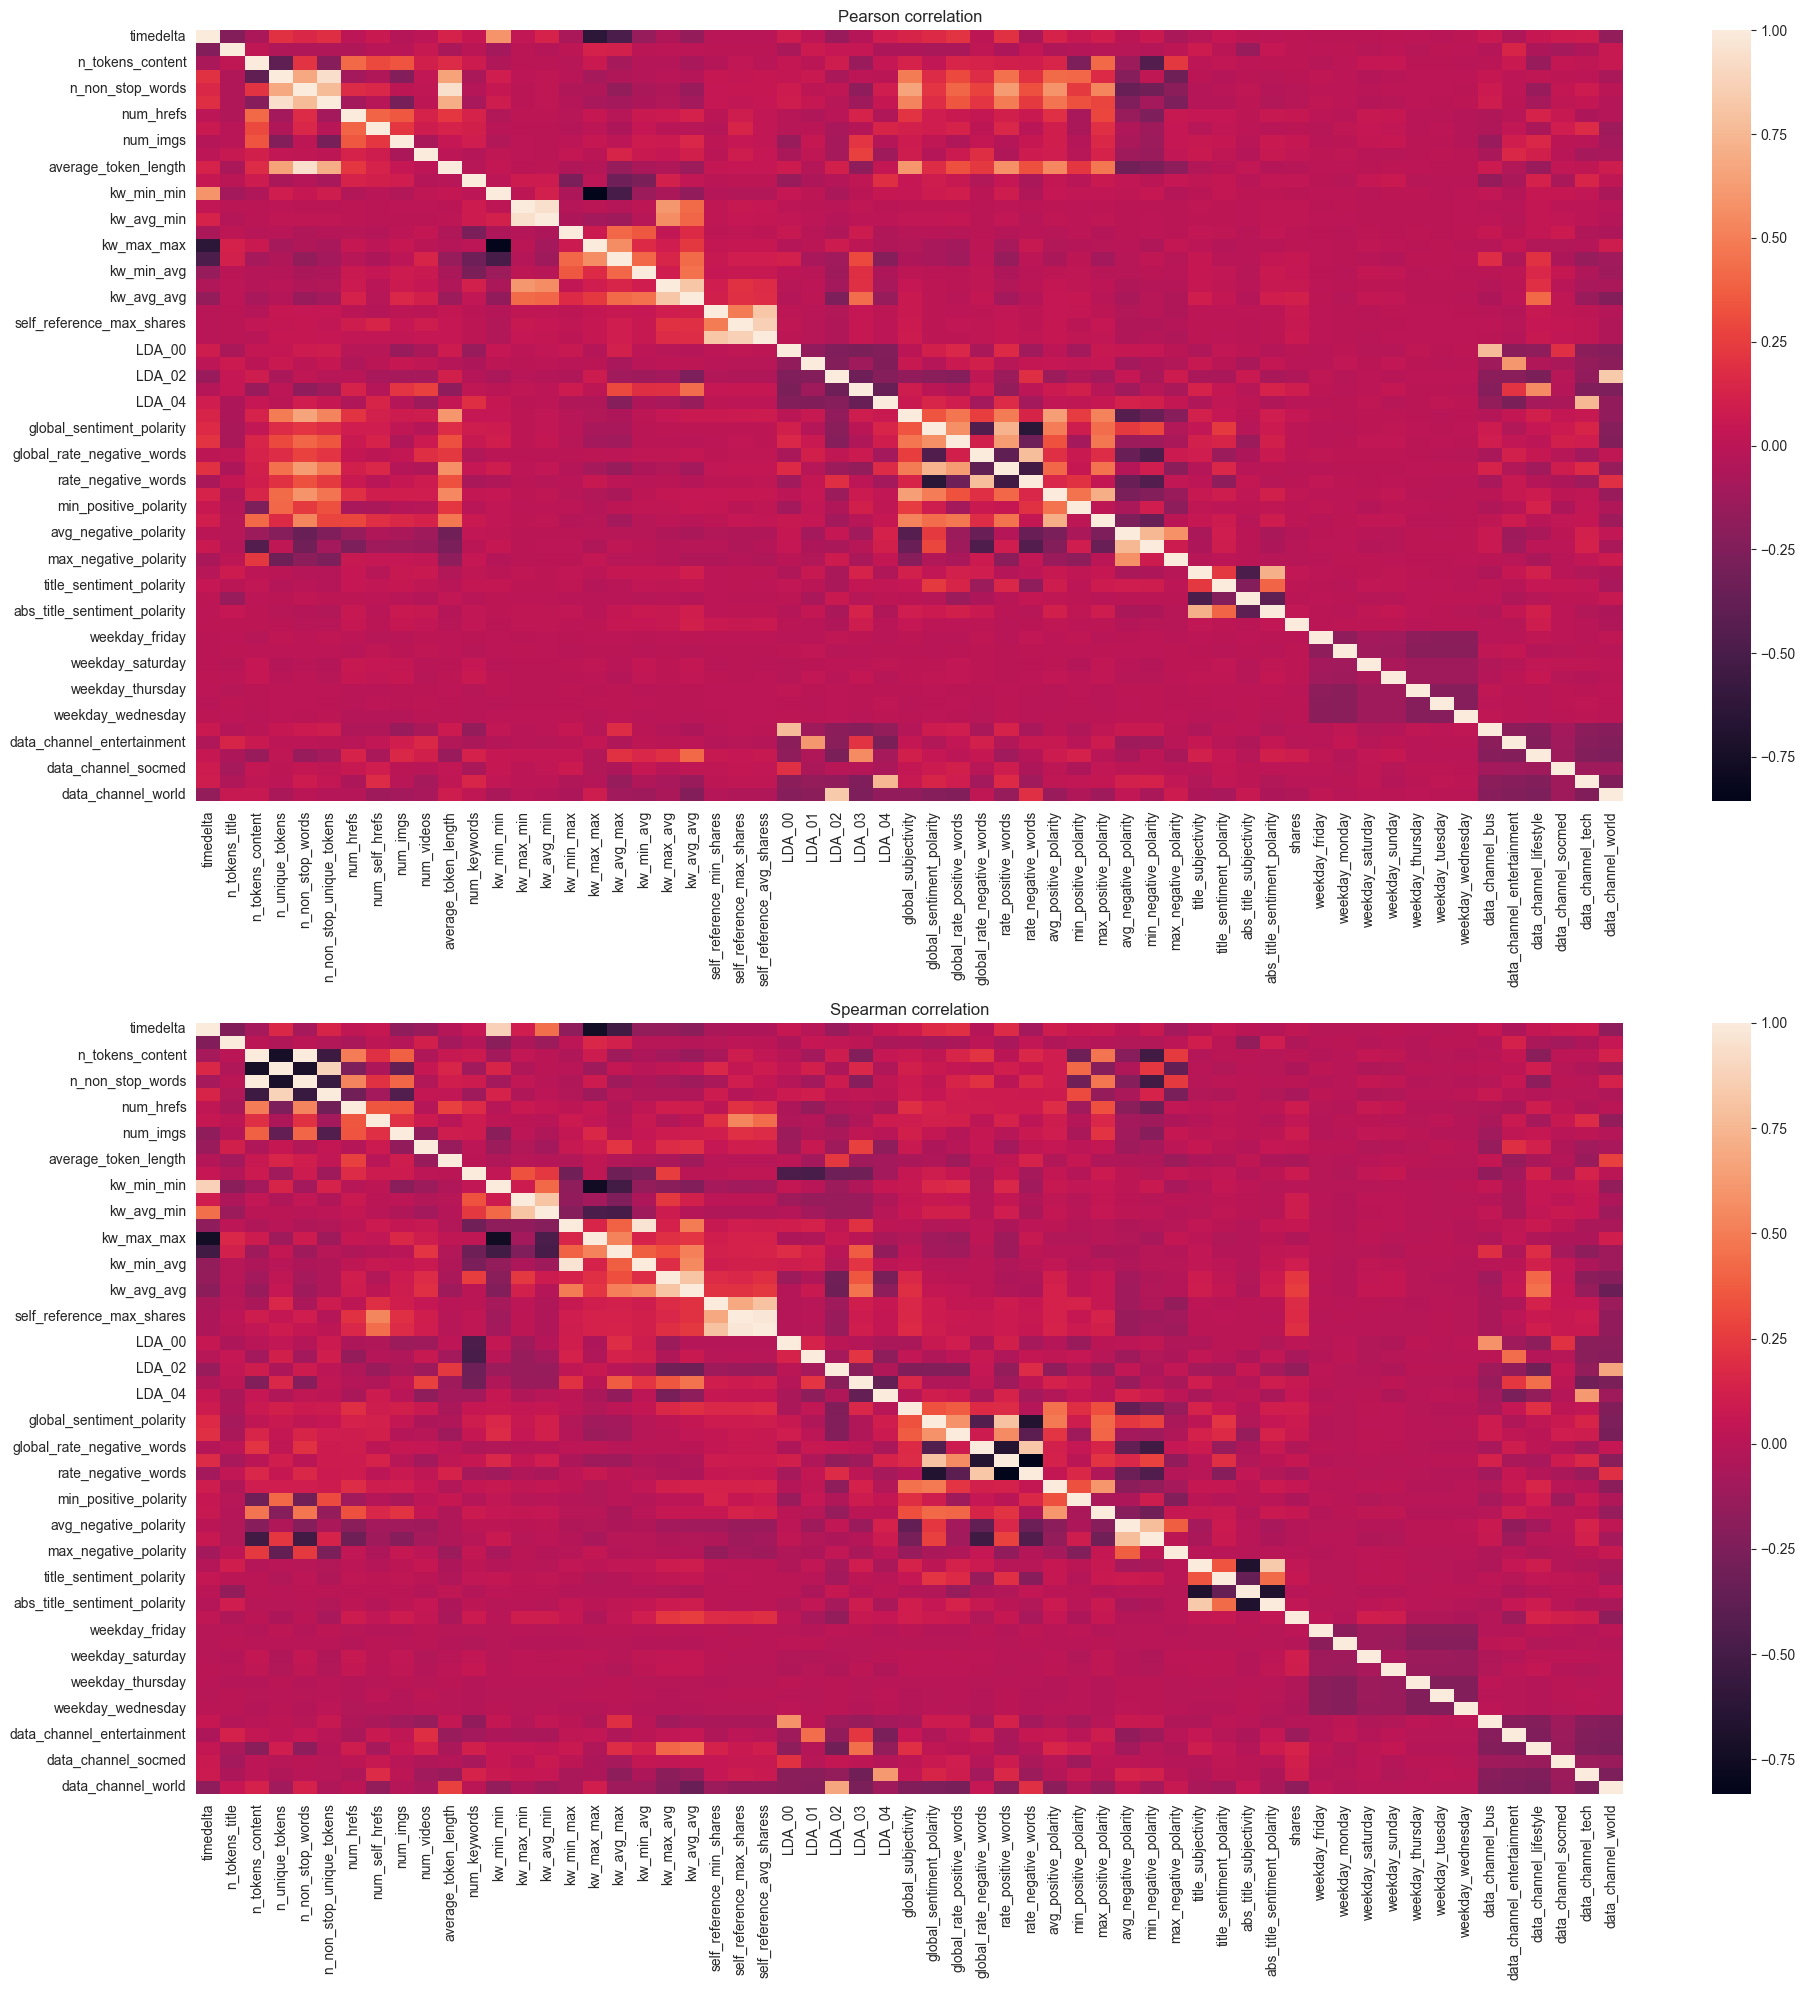

In [21]:
fig, ax = plt.subplots(2,1, figsize = (20,20))
sns.heatmap(corr_mat, ax=ax[0])
sns.heatmap(corr_mat_non_linear, ax=ax[1])
ax[0].set_title('Pearson correlation')
ax[1].set_title('Spearman correlation')
plt.tight_layout()
plt.show()

#### Log scale of target variable
- This brought to an increase of the maximum correlation and a decrease of the minimum correlation w.r.t. the "shares" column with other 2 features. Then working with such a feature would be the best choice
- This improvement has been experience both for linear correlation and for non-linear correlation.

In [23]:
log_target_df = working_df_dev.copy()
log_target_df['shares'] = np.log(working_df_dev['shares'])
log_target_corr = log_target_df.corr()
tmp = log_target_corr['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.21912120669339338
-0.16364778857326123


In [38]:
non_lin_corr_log = log_target_df.corr(method='spearman')
tmp = non_lin_corr_log['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.2593608243962577
-0.16627460991501178


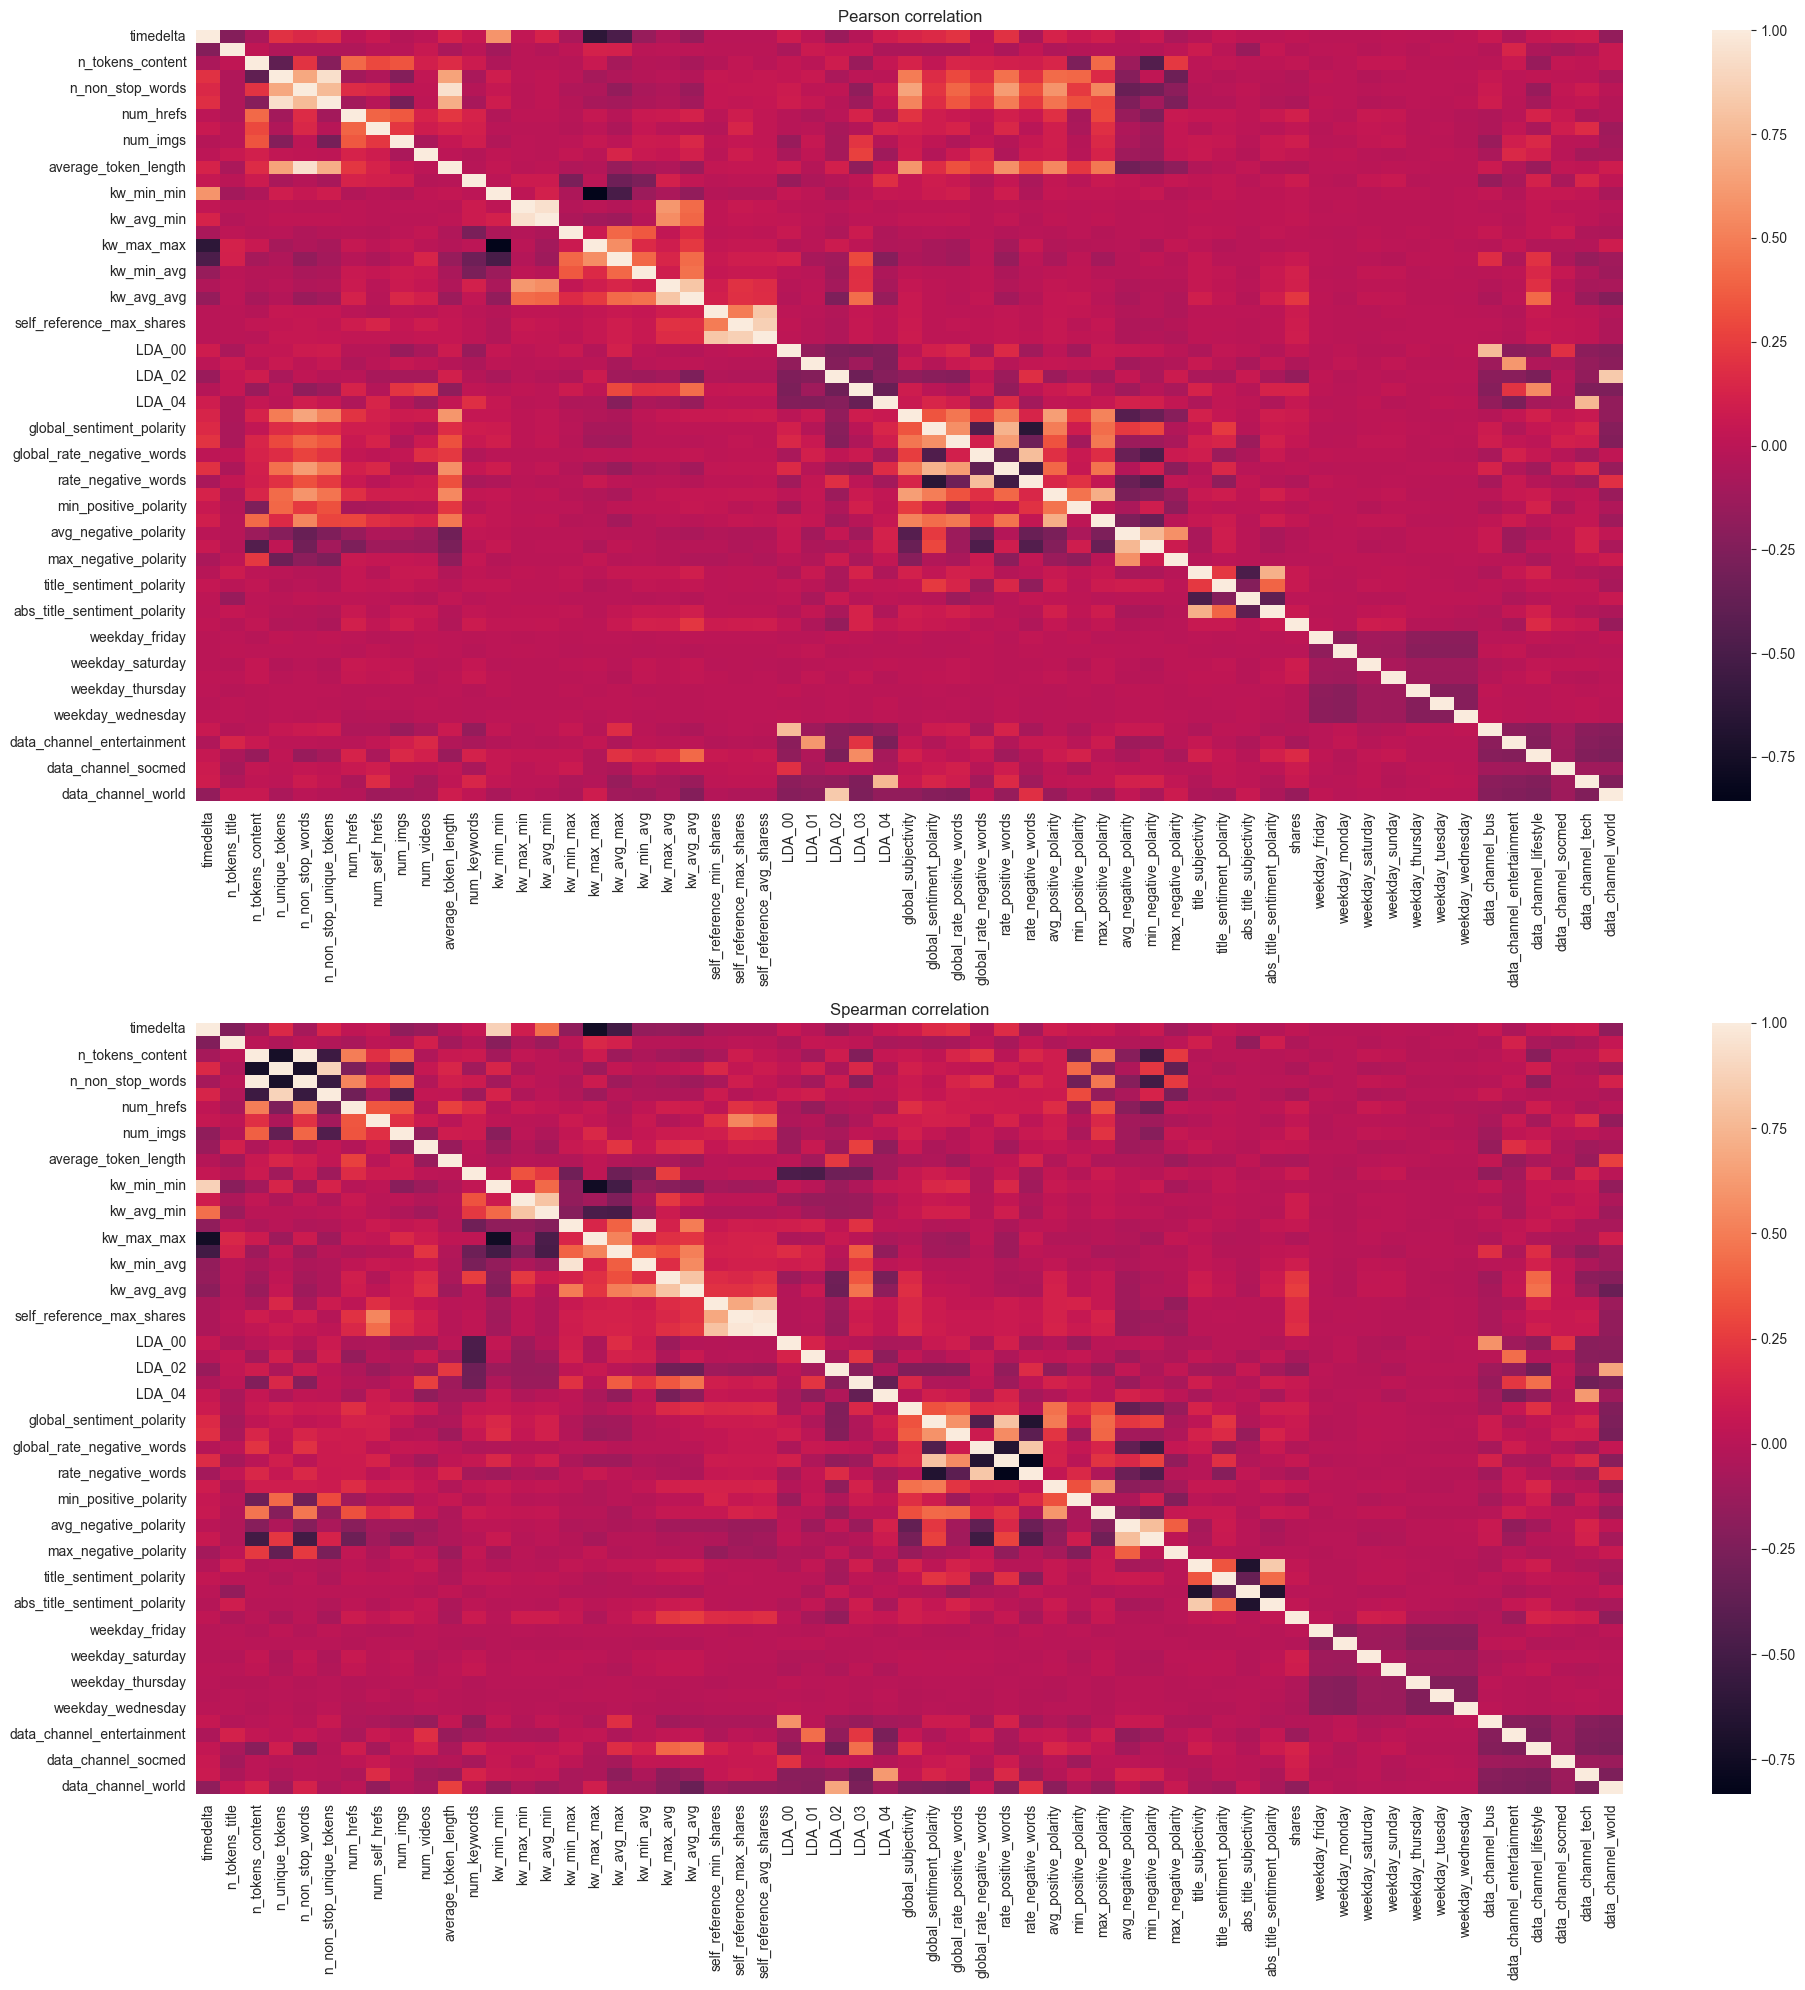

In [33]:
fig, ax = plt.subplots(2,1, figsize = (20,20))
sns.heatmap(log_target_corr, ax=ax[0])
sns.heatmap(non_lin_corr_log, ax=ax[1])
ax[0].set_title('Pearson correlation')
ax[1].set_title('Spearman correlation')
plt.tight_layout()
plt.show()

### Linear correlation

#### Target variable VS temporal features
- Saturday and sunday have a weak linear positive correlation with the target variable

In [72]:
shares_corr = log_target_corr['shares']
shares_corr_sp = non_lin_corr_log['shares']

In [74]:
additional_columns

array(['weekday_friday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'data_channel_bus',
       'data_channel_entertainment', 'data_channel_lifestyle',
       'data_channel_socmed', 'data_channel_tech', 'data_channel_world'],
      dtype=object)

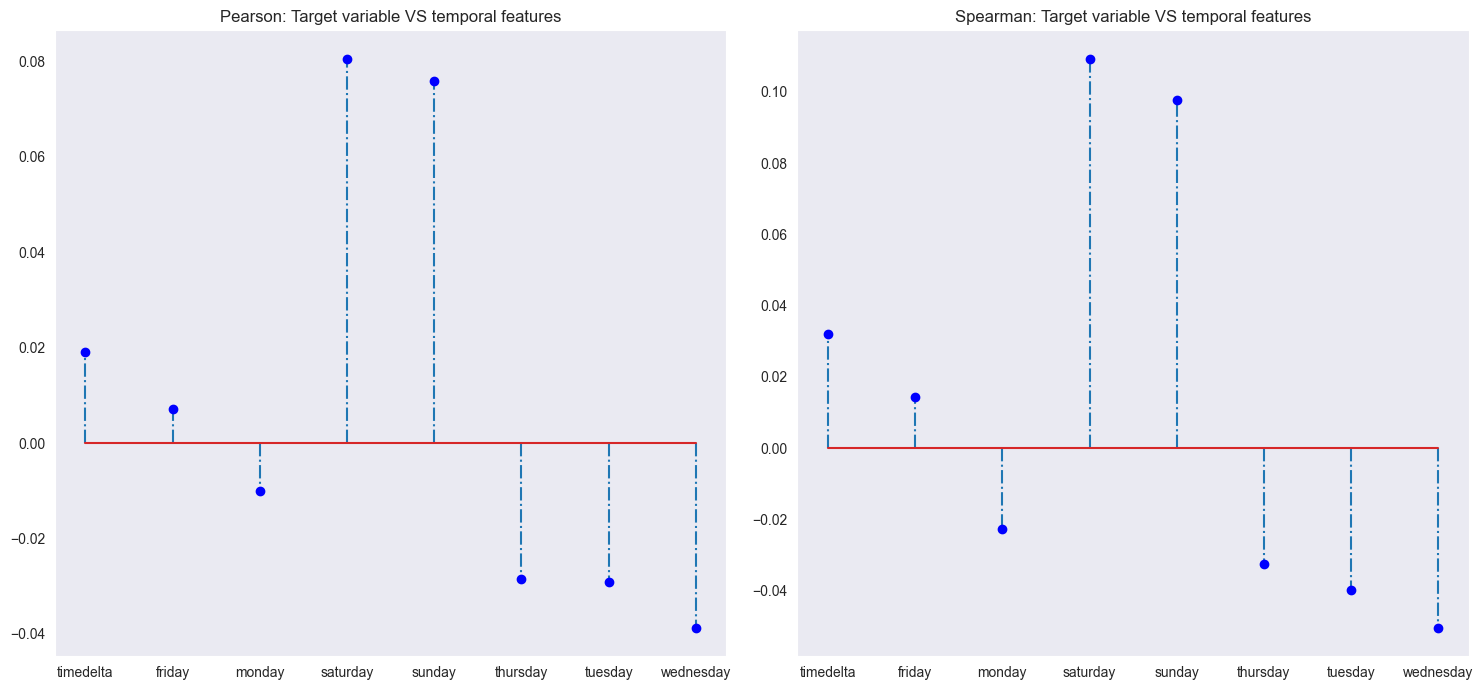

In [78]:
temp_attributes = ['timedelta','weekday_friday', 'weekday_monday', 'weekday_saturday',
                   'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
                   'weekday_wednesday']
df_temp = shares_corr[temp_attributes]
df_temp_sp = shares_corr_sp[temp_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(['timedelta','friday', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday',
       'wednesday'], df_temp, linefmt='-.', markerfmt='bo')
ax[0].grid()
ax[0].set_title("Pearson: Target variable VS temporal features")
ax[1].stem(['timedelta','friday', 'monday', 'saturday',
            'sunday', 'thursday', 'tuesday',
            'wednesday'], df_temp_sp, linefmt='-.', markerfmt='bo')
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS temporal features")

plt.tight_layout()
plt.show()

#### Target variable VS Sentiment features
- The features show a weak linear correlation with the target variable. 

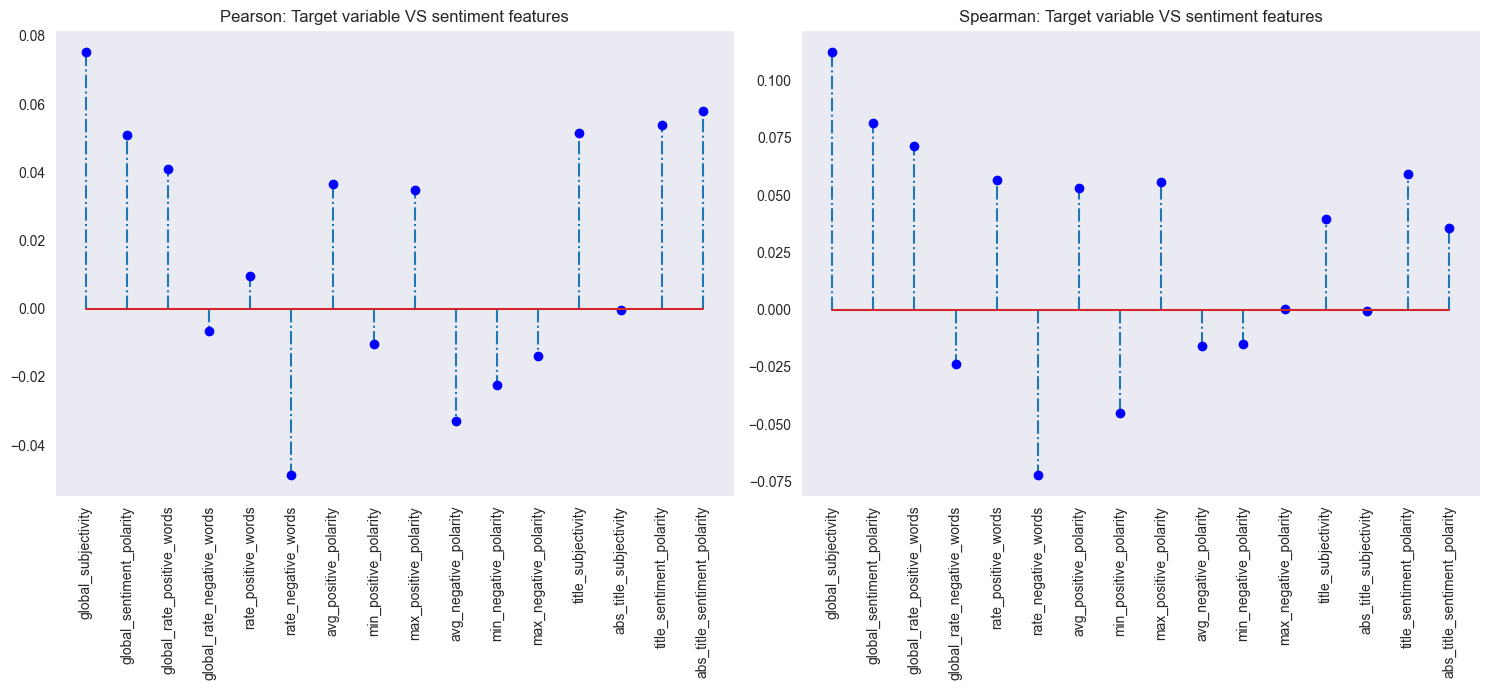

In [86]:
sentiment_attributes = ['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
                        'rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity',
                        'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','abs_title_subjectivity',
                        'title_sentiment_polarity','abs_title_sentiment_polarity']
df_sentiment_corr = shares_corr[sentiment_attributes]
df_sentiment_corr_sp = shares_corr_sp[sentiment_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
                       'rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity',
                       'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','abs_title_subjectivity',
                       'title_sentiment_polarity','abs_title_sentiment_polarity'],
                        df_sentiment_corr, linefmt='-.', markerfmt='bo')
ax[0].grid()
ax[0].set_title("Pearson: Target variable VS sentiment features")
ax[0].tick_params(axis='x', labelrotation = 90)
ax[1].stem(['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
            'rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity',
            'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','abs_title_subjectivity',
            'title_sentiment_polarity','abs_title_sentiment_polarity'],
           df_sentiment_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS sentiment features")
ax[1].tick_params(axis='x', labelrotation = 90)
plt.tight_layout()
plt.show()

#### Target variable VS Media features
- The features show a weak linear correlation with the target variable. 

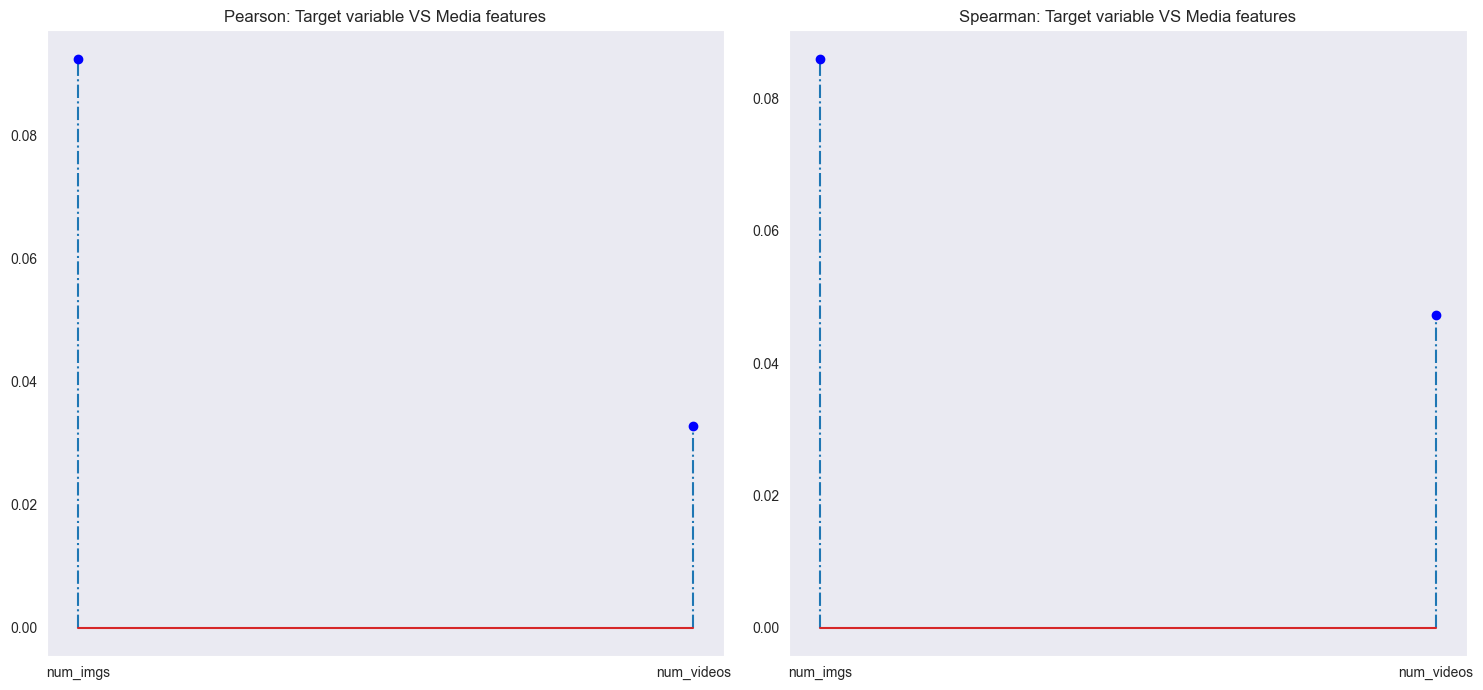

In [87]:
df_media_corr = shares_corr[['num_imgs', 'num_videos']]
df_media_corr_sp = shares_corr_sp[['num_imgs', 'num_videos']]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(['num_imgs', 'num_videos'], df_media_corr, linefmt='-.', markerfmt='bo')
ax[0].grid()
ax[0].set_title("Pearson: Target variable VS Media features")
ax[1].stem(['num_imgs', 'num_videos'], df_media_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS Media features")

plt.tight_layout()
plt.show()

#### Target variable VS Metadata features
- The feature "kw_avg_avg", "kw_min_avg" and "kw_max_avg" shows a relatively high linear correlation with the target variable.
- For what concernes the other variables, the pearson correlation looks like it is on the average of above-analyzed features

Text(0.5, 1.0, 'Correlation: Target variable VS Metadata features')

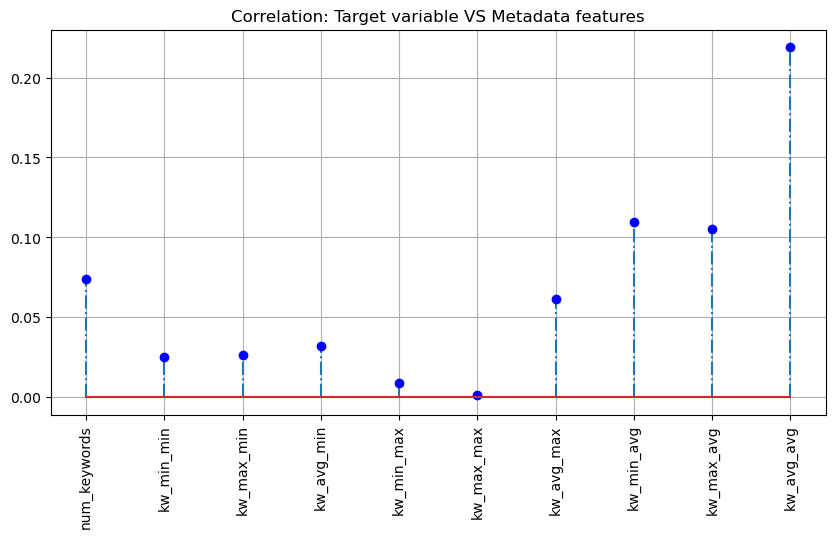

In [70]:
df_metadata_corr = shares_corr[['num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                             'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']]
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.stem(['num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                             'kw_min_avg', 'kw_max_avg', 'kw_avg_avg'], df_metadata_corr, linefmt='-.', markerfmt='bo')
plt.xticks(rotation=90) 
plt.grid()
plt.title("Correlation: Target variable VS Metadata features")

#### Target variable VS Linkage features
- For all the features, the pearson correlation looks like it is on the average of above-analyzed features
- The feature "num_hrefs" shows a relatively high linear correlation with the target variable.

Text(0.5, 1.0, 'Correlation: Target variable VS Linkage features')

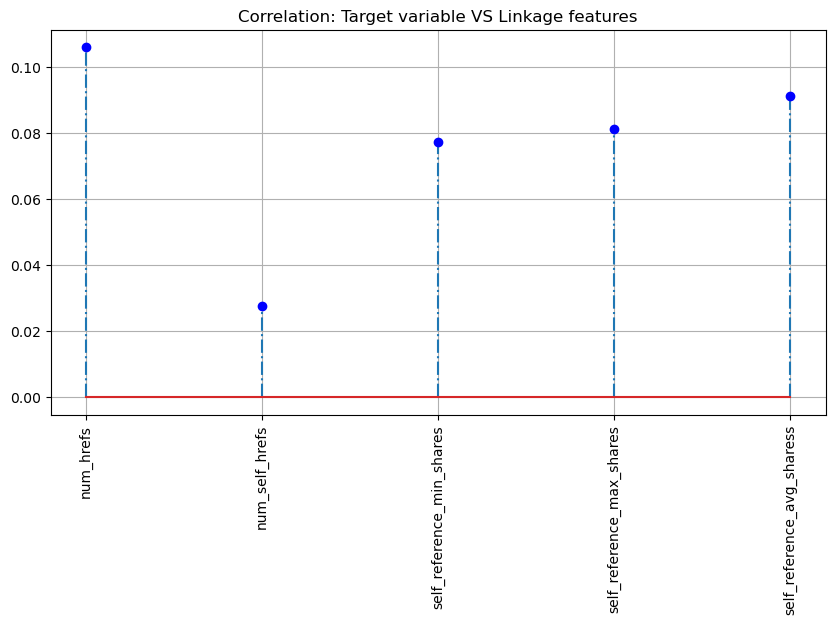

In [71]:
df_linkage_corr = shares_corr[['num_hrefs','num_self_hrefs','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']]
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.stem(['num_hrefs','num_self_hrefs','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess'], df_linkage_corr, linefmt='-.', markerfmt='bo')
plt.xticks(rotation=90) 
plt.grid()
plt.title("Correlation: Target variable VS Linkage features")


#### Target variable VS Article's statistics features
- For all the features, the pearson correlation looks like it is on the average of above-analyzed features

Text(0.5, 1.0, "Correlation: Target variable VS Article's statistics features")

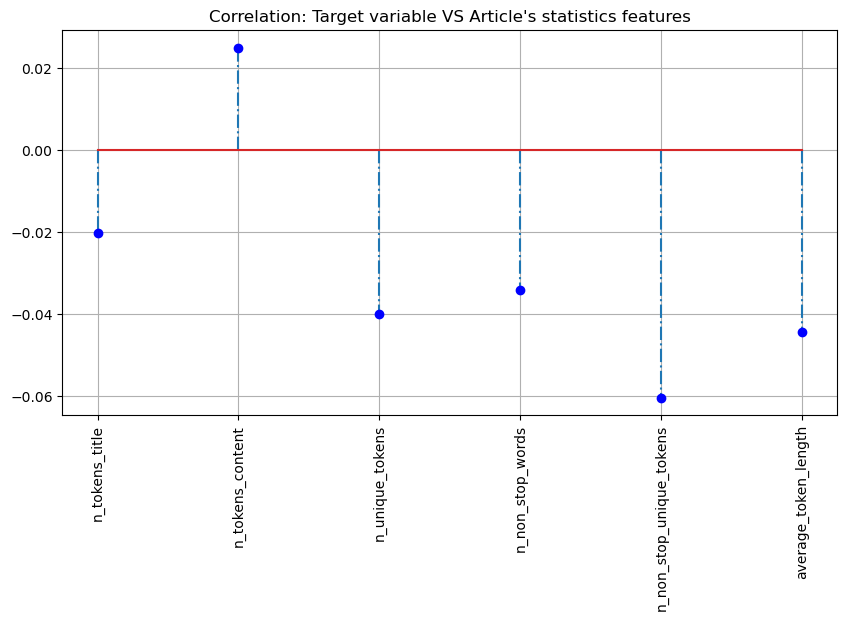

In [72]:
df_article_stats_corr = shares_corr[['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens',
                                     'average_token_length']]
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.stem(['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','average_token_length'], 
        df_article_stats_corr, linefmt='-.', markerfmt='bo')
plt.xticks(rotation=90) 
plt.grid()
plt.title("Correlation: Target variable VS Article's statistics features")


#### Target variable VS Topics features
- Data_channel_lifestyle seems to have a relatively high positive linear correlation with the target value.
- Data_channel_world, LDA_02 and LDA_03 seems to have a relatively high negative linear correlation with the target value.
- For all other features, the pearson correlation looks like it is on the average of above-analyzed features.

In [73]:
additional_columns

array(['weekday_friday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'data_channel_bus',
       'data_channel_entertainment', 'data_channel_lifestyle',
       'data_channel_socmed', 'data_channel_tech', 'data_channel_world'],
      dtype=object)

Text(0.5, 1.0, 'Correlation: Target variable VS Topics features')

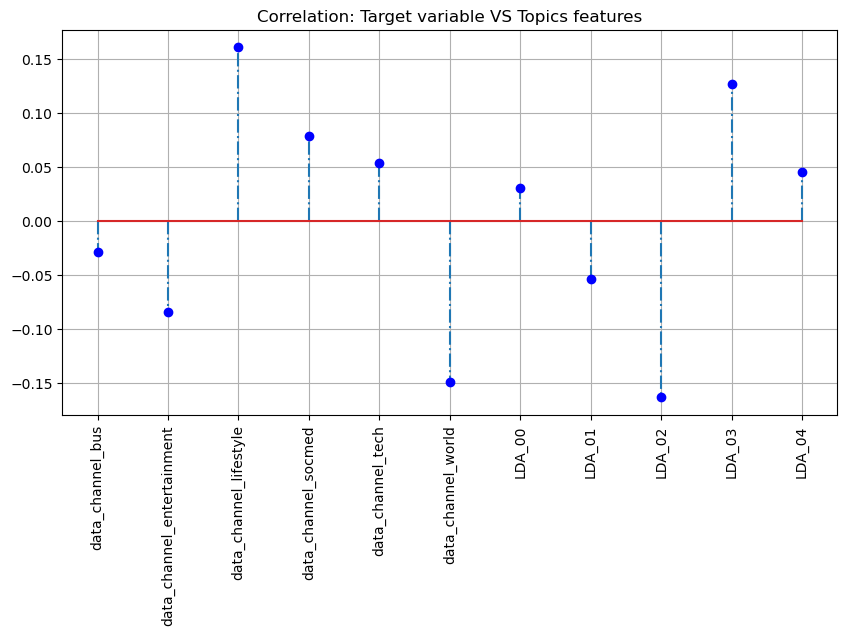

In [74]:
df_topics_corr = shares_corr[['data_channel_bus', 'data_channel_entertainment', 'data_channel_lifestyle', 'data_channel_socmed', 
                              'data_channel_tech', 'data_channel_world', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']]
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.stem(['data_channel_bus', 'data_channel_entertainment', 'data_channel_lifestyle', 'data_channel_socmed', 'data_channel_tech', 
         'data_channel_world', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'], df_topics_corr, linefmt='-.', markerfmt='bo')
plt.xticks(rotation=90) 
plt.grid()
plt.title("Correlation: Target variable VS Topics features") 
